<a href="https://colab.research.google.com/github/Ruthnguli/Twitter-Sentiment-Analysis/blob/main/Yellowstone_Tweets_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A study on Marketing Trends using Twitter Information**


## Defining the Question

### a) Specifying the Data Analytic Question

> To identify customer behavior and trends using successful Twitter platforms.


### b) Defining the Metric for Success

The metrics of success will be attained on obtaining an accuracy score 70%.

### c) Understanding the context


Social media platforms have provided an online platform for individuals to conduct their business and other online activities. They enables us to use features such as hashtags to push certain trending agendas, twitter threads to create bits of stories and a following feature that enables us to narrow down our research. It also provides individuals an opportunity to conduct online surveys or presentations by posting videos. Twitter has also been credited by numerous news outlets as a raw source of information where individuals post stories, pictures of events as they happen. This has made it the most reliable social media network in reporting news.
However, some problems faced when marketing the products include: growth of an online marketing platform takes time, businesses have a hard time targeting the right customers and obtaining financial trends from customer behavior requires the use of Machine learning techniques not familiar to most people. 


### d) Recording the Experimental Design

1. Define the question, the metric for success, the context, experimental design taken.

2. Read and explore the given dataset.

3. Define the appropriateness of the available data to answer the given question.

4. Find and deal with outliers, anomalies, and missing data within the dataset.

5. Perform univariate, bivariate and multivariate analysis recording your observations.

6. Implementing the Solution.

7. Challenging the solution.

In [ ]:
pip install snscrape

In [ ]:
!pip3 install ktrain

In [ ]:
!python -m pip install tensorflow_text

## Scrapping EABL data

In [ ]:
# Importing Libraries
#
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import ktrain
from ktrain import text
import tensorflow_hub as hub
import tensorflow_text as text
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sn
import os
import snscrape.modules.twitter as sntwitter
import re, string

In [ ]:
# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('EABL').get_items()):
    if i>5000:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.username])
    
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Tweet', 'Username'])

In [ ]:
# Previewing the top 20 of data
#
tweets_df2.head(20)

,Datetime,Tweet Id,Tweet,Username
0,2022-04-13 18:54:36+00:00,1514316137978290178,@belladonnarthy @EABL_PLC @OfficialEABL Why no...,Sunnyb02
1,2022-04-13 16:51:57+00:00,1514285273282142208,I have made the executive decision to dump a m...,__Gitonga
2,2022-04-13 12:04:59+00:00,1514213052534726659,@Gossip_ke EABL,Freakyf46977371
3,2022-04-13 10:30:35+00:00,1514189299079516164,A personal mindset may no longer be benefiting...,1nVINCEabl3
4,2022-04-13 10:28:14+00:00,1514188705497554950,"@DCI_Kenya These people need to be supported, ...",Alfiemathiu
5,2022-04-13 09:16:34+00:00,1514170672083259395,@Gossip_ke @EABL_PLC,MMXLVIII_i
6,2022-04-13 07:08:13+00:00,1514138369785270278,@Iceykev @EABL_PLC https://t.co/fOsopPownv,riley_kev
7,2022-04-13 06:40:34+00:00,1514131410344284160,"@FionaZerbst So sweet!!! So how's the ""work"" c...",eabl81
8,2022-04-13 06:05:38+00:00,1514122621822111746,"@riley_kev @EABL_PLC Haha, Wilding! 😅",Iceykev
9,2022-04-13 06:04:28+00:00,1514122326094327811,@Iceykev @EABL_PLC One of those days...😂,riley_kev


In [ ]:
# Preview the shape of data
#
tweets_df2.shape

(5001, 4)

> We have 5001 records and 4 variables

In [ ]:
# preview of 20 random samples
#
tweets_df2.sample(10)

,Datetime,Tweet Id,Tweet,Username
1201,2022-03-04 21:34:01+00:00,1499860739745628161,"Fridays hukua 🔥🔥,imagine Sammy Kioko na Janesi...",real_ziro
4957,2021-10-14 13:18:09+00:00,1448639261889253376,@ovofuegoopt2 So you want EABL to close,wangeciouma
4588,2021-10-28 14:43:12+00:00,1453734096987852800,East African Breweries Limited (EABL) said Tue...,KinyanjuiTm
3494,2021-12-14 11:17:17+00:00,1470714506548551683,"That's how sudden ""issues"" about EABL and InBe...",NChrisKK
3628,2021-12-06 19:31:10+00:00,1467939692280791040,@EABL_PLC @AJ_Michira @thedigitaldiva Leadersh...,CapitalFMKenya
3194,2021-12-26 16:33:13+00:00,1475142669168951296,@EABL_PLC bring TPF back https://t.co/cJre44vFwE,bubbles_ngatia
3836,2021-11-27 11:36:45+00:00,1464558812728279045,@Wamuhu_ @DanSuperdan2 unabaki kujiuliza kwani...,ja_Kojungo
1913,2022-02-09 13:09:45+00:00,1491398919250923524,@Gitz__ At kenya brewery @EABL_PLC,Altonsafaris
4968,2021-10-14 07:56:01+00:00,1448558194054287360,@kajonee @KarauriR Huh? Does that mean EABL ma...,MondKanga
2497,2022-01-22 09:21:59+00:00,1484818617132802050,@magero256 @UgandaBreweries @Bell_Lager @ainby...,Festo256


## Cleaning data

In [ ]:
# dropping irrelevant columns
df = tweets_df2.drop(['Datetime', 'Tweet Id', 'Username'], axis = 1) 

# renaming column 
df.columns = ['tweet']

# previewing datset
df.sample(5)

,tweet
3098,@yvy___ na eabl iko huko pia
454,Weekend EABL prep in the books\n\n#BritishBask...
2715,@EABL_PLC kindly confirm the authenticity of t...
4117,Data is in the Heart of everything. There is a...
848,@KotoshKemboi @Dianadeesan @Ooro28279768 @Nels...


In [ ]:
#function for sorting the multiple hashes and multiple @
#also sorts out @'s and # that occur within text
# changes lonesome @ to at
def find_the (text):
    while len(re.findall('##' , text)) != 0:
        text = re.sub('##' , '#' ,text)
    while len(re.findall('@@' , text)) != 0:
        text = re.sub('@@' , '@' ,text)

    no_h = len(re.findall('#',text))
    #make sure the @ is changed for at
    no_a = len(re.findall('@',text))
    
    text = re.sub('@(\s|\.|\?|,|;|:|!|\(|\))', 'at' , text)
    text = re.sub('\s' , ' ' , text)
    text = re.sub('\S@' , ' @' , text)
    text = re.sub('\S#' , ' #' , text)

    #while len(re.findall('\s\s' , text)) != 0:
    #    text = re.sub('\s\s' , '\s' ,text)

    #none_repeat = text
    text_a = text.split()

            
    return text

In [ ]:
# getting non repetitive column
#
df['nr_tweet'] = df.tweet.apply(lambda d: find_the(d))
df.head()

,tweet,nr_tweet
0,@belladonnarthy @EABL_PLC @OfficialEABL Why no...,@belladonnarthy @EABL_PLC @OfficialEABL Why no...
1,I have made the executive decision to dump a m...,I have made the executive decision to dump a m...
2,@Gossip_ke EABL,@Gossip_ke EABL
3,A personal mindset may no longer be benefiting...,A personal mindset may no longer be benefiting...
4,"@DCI_Kenya These people need to be supported, ...","@DCI_Kenya These people need to be supported, ..."


> Are hashtags and @'s case sensitive? \
Usernames are case sensitive while hashtags are not case sensitive

### Lemmatization 

In [ ]:
#Importing lemmatization libraries
import nltk

from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Applying Lemmmatizer to remove tenses from texts.
lemmatizer = WordNetLemmatizer()
#stemmer = SnowballStemmer("english")
STOPWORDS.update(['mkr', 'didn', 'bc', 'n', 'm', 
                  'im', 'll', 'y', 've', 'u', 'ur', 'don', 
                  'p', 't', 's', 'aren', 'kp', 'o', 'kat', 
                  'de', 're', 'amp', 'will'])# 'rt'
corpus = []
def preprocess_tweet(tweet):
    tweet = re.sub(r"won\'t", "will not", tweet)
    tweet = re.sub(r"can\'t", "can not", tweet)
    tweet = re.sub(r"n\'t", " not", tweet)
    tweet = re.sub(r"\'re", " are", tweet)
    tweet = re.sub(r"\'s", " is", tweet)
    tweet = re.sub(r"\'d", " would",tweet)
    tweet = re.sub(r"\'ll", " will", tweet)
    tweet = re.sub(r"\'t", " not", tweet)
    tweet = re.sub(r"\'ve", " have", tweet)
    tweet = re.sub(r"\'m", " am", tweet)
    #tweet = re.sub('[^a-zA-Z]',' ',tweet)
    #tweet = re.sub(r'[^\x00-\x7f]','',tweet)
    #tweet = " ".join([stemmer.stem(word) for word in tweet.split()])
    tweet = [lemmatizer.lemmatize(word) for word in tweet.split() if not word in set(STOPWORDS)]
    tweet = ' '.join(tweet)
    return tweet

> Examples of how stemmer and lemmatization works

In [ ]:
lemmatizer.lemmatize('<<<<1>>>>')

'<<<<1>>>>'

In [ ]:
lemmatizer.lemmatize("shoes")

'shoe'

In [ ]:
lemmatizer.lemmatize('<<yellowstone<<0>>yellowstone>>')

'<<yellowstone<<0>>yellowstone>>'

In [ ]:
re.sub('[<>]' , '' , '<<<<1>>>>')

'1'

In [ ]:
# Creating a tag maker function to...................

def tag_maker (text):
  text_a = text.split()
  tag_a = []
  for r in range(0, len(text_a)):
    if text_a[r].startswith('#') or text_a[r].startswith('@'):
      tag_name = '<<yellowstone<<' + str(len(tag_a)) + '>>yellowstone>>'
      tag_a.append(text_a[r])
      text_a[r] = tag_name

  r_text = ' '.join(text_a)

  return [r_text , tag_a]

In [ ]:
# Creating a tag replacer function for...................

def tag_replacer (text , tag_a):
  text_a = text.split()

  for r in range(0, len(text_a)):
    if ('<<yellowstone<<' in text_a[r]) and ('>>yellowstone>>' in text_a[r]):
      num = text_a[r]
      num = num[15:][:-15]
      num = int(num)
      text_a[r] = tag_a[num]

  r_text = ' '.join(text_a)

  return r_text

In [ ]:
# Creating a lema and stem function to...................

def tags_lema_stem(text):
  for_lem = tag_maker(text)
  for_tag_removal = preprocess_tweet(for_lem[0])
  r_text = tag_replacer(for_tag_removal, for_lem[1])

  return r_text

> Examples of how the 3 functions work together and how they will operate inside our code.

In [ ]:
p = "@EABL_PLC  note that a Litre of Guinness Or @TuskerLager , @WhiteCapLager wouldn't be bad to those that love drinking while on road trips or Transit. Jalang'o Mejja &amp; Redsan Chiloba #Sipangwingwi https://t.co/hi3deFVxAY"

In [ ]:
u7 = tag_maker("@EABL_PLC  note that a Litre of Guinness Or @TuskerLager , @WhiteCapLager wouldn't be bad to those that love drinking while on road trips or Transit. Jalang'o Mejja &amp; Redsan Chiloba #Sipangwingwi https://t.co/hi3deFVxAY")

In [ ]:
u7[0]

"<<yellowstone<<0>>yellowstone>> note that a Litre of Guinness Or <<yellowstone<<1>>yellowstone>> , <<yellowstone<<2>>yellowstone>> wouldn't be bad to those that love drinking while on road trips or Transit. Jalang'o Mejja &amp; Redsan Chiloba <<yellowstone<<3>>yellowstone>> https://t.co/hi3deFVxAY"

In [ ]:
u7[1]

['@EABL_PLC', '@TuskerLager', '@WhiteCapLager', '#Sipangwingwi']

In [ ]:
tag_replacer (u7[0] , u7[1])

"@EABL_PLC note that a Litre of Guinness Or @TuskerLager , @WhiteCapLager wouldn't be bad to those that love drinking while on road trips or Transit. Jalang'o Mejja &amp; Redsan Chiloba #Sipangwingwi https://t.co/hi3deFVxAY"

In [ ]:
tags_lema_stem(p)

"@EABL_PLC note Litre Guinness Or @TuskerLager , @WhiteCapLager bad love drinking road trip Transit. Jalang'o Mejja &amp; Redsan Chiloba #Sipangwingwi https://t.co/hi3deFVxAY"

In [ ]:
# We take the non repetitive tweets and change them to lower case, expose them to the tags_lema_stem 
# as well as, removing the (not so sure) while still maintaining the hashtags and ats



df['c_tweet'] = df['nr_tweet'].str.lower()

df['c_tweet'] = df['c_tweet'].apply (lambda i : tags_lema_stem(i))

df['c_tweet'] = df['c_tweet'].apply(lambda i : re.sub('[^a-zA-Z0-9_#@ ]','',i)) #maintains the hashtags and the @'s

df.head(20)

,tweet,nr_tweet,c_tweet
0,@belladonnarthy @EABL_PLC @OfficialEABL Why no...,@belladonnarthy @EABL_PLC @OfficialEABL Why no...,@belladonnarthy @eabl_plc @officialeabl talk m...
1,I have made the executive decision to dump a m...,I have made the executive decision to dump a m...,made executive decision dump majority eabl sha...
2,@Gossip_ke EABL,@Gossip_ke EABL,@gossip_ke eabl
3,A personal mindset may no longer be benefiting...,A personal mindset may no longer be benefiting...,personal mindset may longer benefiting you mot...
4,"@DCI_Kenya These people need to be supported, ...","@DCI_Kenya These people need to be supported, ...",@dci_kenya people need supported educated allo...
5,@Gossip_ke @EABL_PLC,@Gossip_ke @EABL_PLC,@gossip_ke @eabl_plc
6,@Iceykev @EABL_PLC https://t.co/fOsopPownv,@Iceykev @EABL_PLC https://t.co/fOsopPownv,@iceykev @eabl_plc httpstcofosoppownv
7,"@FionaZerbst So sweet!!! So how's the ""work"" c...","@FionaZerbst So sweet!!! So how's the ""work"" c...",@fionazerbst sweet work coming
8,"@riley_kev @EABL_PLC Haha, Wilding! 😅","@riley_kev @EABL_PLC Haha, Wilding! 😅",@riley_kev @eabl_plc haha wilding
9,@Iceykev @EABL_PLC One of those days...😂,@Iceykev @EABL_PLC One of those days...😂,@iceykev @eabl_plc one days


In [ ]:
# fuction to get the ats and hashes out 

def hash_and_ats (text):
    text_a = text.split()
    hash_list = []
    at_list = []
    
    for a in text_a:
        
        if a.startswith('#'):
            a = a.lower()
            hash_list.append(a)
        elif a.startswith('@'):
            at_list.append(a)

    return [hash_list , at_list]

In [ ]:
# getting the hashtag and ats columns
#
df['hashtags'] = df['nr_tweet'].apply(lambda f : hash_and_ats(f)[0])
df['ats'] = df['nr_tweet'].apply(lambda f : hash_and_ats(f)[1])

# preview of random 20 
#
df.sample(2)

,tweet,nr_tweet,c_tweet,hashtags,ats
874,"@NationAfrica Very well put,keroche and eabl i...","@NationAfrica Very well put,keroche and eabl i...",@nationafrica well putkeroche eabl one sentenc...,[],[@NationAfrica]
1233,@anacklet_ @MarigaThoithi Who owns the most sh...,@anacklet_ @MarigaThoithi Who owns the most sh...,@anacklet_ @marigathoithi owns share kbl eabl ...,[],"[@anacklet_, @MarigaThoithi]"


In [ ]:
# removes words that start with at predefined set of characters in a list
def header_remover(text, hr):
    to_drop = hr
    text_a = text.split()
    for g in range(len(text_a)-1, -1 , -1):
        for a in to_drop:
            if text_a[g].startswith(a):
                text_a.pop(g)
                break

    text = ' '.join(text_a)
    return text

In [ ]:

df['m_tweet'] = df['c_tweet'].apply(lambda i : header_remover(i , ['#' , '@']))
df['h_tweet'] = df['c_tweet'].apply(lambda i : header_remover(i , ['@']))
df['a_tweet'] = df['c_tweet'].apply(lambda i : header_remover(i , ['#']))

In [ ]:
#the rest of the stats
df['no_of_punctuations'] = df.tweet.apply(lambda x : len(re.findall('[^a-zA-Z0-9_ ]', x)))
df['no_of_at'] = df['ats'].apply ( lambda s : len(s))
df['no_of_hashes'] = df['ats'].apply ( lambda s : len(s))
df['no_of_words'] = df['nr_tweet'].apply ( lambda s : len(s.split()))
#no of words without @
df['no_of_words_no_at'] = df['no_of_words'] - df['no_of_at']
#no of words without #
df['no_of_words_no_hash'] = df['no_of_words'] - df['no_of_hashes']
#no of words without @ and #
df['no_of_words_no_at_hash'] = df['no_of_words'] - df['no_of_at'] - df['no_of_hashes']
df['length_of_tweet'] = df['nr_tweet'].apply (lambda y : len(y))


In [ ]:
df.head(20)

,tweet,nr_tweet,c_tweet,hashtags,ats,m_tweet,h_tweet,a_tweet,no_of_punctuations,no_of_at,no_of_hashes,no_of_words,no_of_words_no_at,no_of_words_no_hash,no_of_words_no_at_hash,length_of_tweet
0,@belladonnarthy @EABL_PLC @OfficialEABL Why no...,@belladonnarthy @EABL_PLC @OfficialEABL Why no...,@belladonnarthy @eabl_plc @officialeabl talk m...,[],"[@belladonnarthy, @EABL_PLC, @OfficialEABL]",talk man standing next youthe way fucking frie...,talk man standing next youthe way fucking frie...,@belladonnarthy @eabl_plc @officialeabl talk m...,12,3,3,55,52,52,49,300
1,I have made the executive decision to dump a m...,I have made the executive decision to dump a m...,made executive decision dump majority eabl sha...,[],[],made executive decision dump majority eabl sha...,made executive decision dump majority eabl sha...,made executive decision dump majority eabl sha...,3,0,0,40,40,40,40,218
2,@Gossip_ke EABL,@Gossip_ke EABL,@gossip_ke eabl,[],[@Gossip_ke],eabl,eabl,@gossip_ke eabl,1,1,1,2,1,1,0,15
3,A personal mindset may no longer be benefiting...,A personal mindset may no longer be benefiting...,personal mindset may longer benefiting you mot...,[],[],personal mindset may longer benefiting you mot...,personal mindset may longer benefiting you mot...,personal mindset may longer benefiting you mot...,9,0,0,16,16,16,16,106
4,"@DCI_Kenya These people need to be supported, ...","@DCI_Kenya These people need to be supported, ...",@dci_kenya people need supported educated allo...,[],[@DCI_Kenya],people need supported educated allowed legit b...,people need supported educated allowed legit b...,@dci_kenya people need supported educated allo...,6,1,1,51,50,50,49,291
5,@Gossip_ke @EABL_PLC,@Gossip_ke @EABL_PLC,@gossip_ke @eabl_plc,[],"[@Gossip_ke, @EABL_PLC]",,,@gossip_ke @eabl_plc,2,2,2,2,0,0,-2,20
6,@Iceykev @EABL_PLC https://t.co/fOsopPownv,@Iceykev @EABL_PLC https://t.co/fOsopPownv,@iceykev @eabl_plc httpstcofosoppownv,[],"[@Iceykev, @EABL_PLC]",httpstcofosoppownv,httpstcofosoppownv,@iceykev @eabl_plc httpstcofosoppownv,7,2,2,3,1,1,-1,42
7,"@FionaZerbst So sweet!!! So how's the ""work"" c...","@FionaZerbst So sweet!!! So how's the ""work"" c...",@fionazerbst sweet work coming,[],[@FionaZerbst],sweet work coming,sweet work coming,@fionazerbst sweet work coming,9,1,1,9,8,8,7,54
8,"@riley_kev @EABL_PLC Haha, Wilding! 😅","@riley_kev @EABL_PLC Haha, Wilding! 😅",@riley_kev @eabl_plc haha wilding,[],"[@riley_kev, @EABL_PLC]",haha wilding,haha wilding,@riley_kev @eabl_plc haha wilding,5,2,2,5,3,3,1,37
9,@Iceykev @EABL_PLC One of those days...😂,@Iceykev @EABL_PLC One of those days...😂,@iceykev @eabl_plc one days,[],"[@Iceykev, @EABL_PLC]",one days,one days,@iceykev @eabl_plc one days,6,2,2,6,4,4,2,40


## testing for digits

In [ ]:
# contains a list of the beginning of the words that should be dropped
#
header_drop = ['http']

In [ ]:
df['is_there_digit'] = df['m_tweet'].apply(lambda y : len(re.findall('[0-9]' , y)))

In [ ]:
m = df[(df['is_there_digit'] != 0)]

In [ ]:
m['m_tweet'] = m['m_tweet'].apply(lambda r : header_remover(r, ['http']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# m.loc[1 , 'm_tweet']

In [ ]:
m['is_there_digit'] = m['m_tweet'].apply(lambda y : len(re.findall('[0-9]' , y)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#m.loc[3, 'nr_tweet']

In [ ]:
m[(m['is_there_digit'] != 0)]

,tweet,nr_tweet,c_tweet,hashtags,ats,m_tweet,h_tweet,a_tweet,no_of_punctuations,no_of_at,no_of_hashes,no_of_words,no_of_words_no_at,no_of_words_no_hash,no_of_words_no_at_hash,length_of_tweet,is_there_digit
17,Today was a good Wordle day!\n\nWordle 297 2/6...,Today was a good Wordle day! Wordle 297 2/6 ...,today good wordle day wordle 297 26,[],[],today good wordle day wordle 297 26,today good wordle day wordle 297 26,today good wordle day wordle 297 26,17,0,0,11,11,11,11,57,5
29,@Flossie_mwaura April : Kengen dividends\nMay ...,@Flossie_mwaura April : Kengen dividends May :...,@flossie_mwaura april kengen dividend may eq...,[],[@Flossie_mwaura],april kengen dividend may equity dividend june...,april kengen dividend may equity dividend june...,@flossie_mwaura april kengen dividend may equi...,14,1,1,35,34,34,33,220,5
36,"I’m attending Field Team 6’s event, “Defend De...","I’m attending Field Team 6’s event, “Defend De...",im attending field team 6s event defend democr...,[#fieldteam6],[],im attending field team 6s event defend democr...,im attending field team 6s event defend democr...,im attending field team 6s event defend democr...,14,0,0,26,26,26,26,165,2
38,DIVIDENDS. \n\nApr 27 2022\n\nSCBK Standard Ch...,DIVIDENDS. Apr 27 2022 SCBK Standard Charte...,dividends apr 27 2022 scbk standard chartered ...,[],[],dividends apr 27 2022 scbk standard chartered ...,dividends apr 27 2022 scbk standard chartered ...,dividends apr 27 2022 scbk standard chartered ...,25,0,0,42,42,42,42,275,22
45,Today's Wordle result:\n\nWordle 296 4/6\n\n⬜⬜...,Today's Wordle result: Wordle 296 4/6 ⬜⬜🟨⬜⬜ ...,today wordle result wordle 296 46,[],[],today wordle result wordle 296 46,today wordle result wordle 296 46,today wordle result wordle 296 46,30,0,0,10,10,10,10,63,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4971,As we join the globe in celebrating #WorldSigh...,As we join the globe in celebrating #WorldSigh...,join globe celebrating #worldsightday immensel...,"[#worldsightday,]",[@Sightsavers.],join globe celebrating immensely proud inclusi...,join globe celebrating #worldsightday immensel...,join globe celebrating immensely proud inclusi...,13,1,1,42,41,41,40,307,4
4979,EABL\n\nItchen suffer defeat on the road at JM...,EABL Itchen suffer defeat on the road at JMA ...,eabl itchen suffer defeat road jma slow second...,"[#kestrelsfamily, #gameday, #theeabl]",[],eabl itchen suffer defeat road jma slow second...,eabl itchen suffer defeat road jma slow second...,eabl itchen suffer defeat road jma slow second...,18,0,0,34,34,34,34,233,3
4988,Wins across the board 🤩🤩 \n\nFINAL SCORES: \n\...,Wins across the board 🤩🤩 FINAL SCORES: EAB...,win across board final scores eabl 7565 weab...,"[#wearejma, #jmarockets, #rocketslaunchpad]",[],win across board final scores eabl 7565 weabl ...,win across board final scores eabl 7565 weabl ...,win across board final scores eabl 7565 weabl ...,25,0,0,19,19,19,19,143,8
4994,"""I think being in an organization that looks f...","""I think being in an organization that looks f...",i think organization look raw talent nurture h...,[],[],i think organization look raw talent nurture h...,i think organization look raw talent nurture h...,i think organization look raw talent nurture h...,10,0,0,54,54,54,54,278,2


## End of testing for digits

In [ ]:
df.head(20)

,tweet,nr_tweet,c_tweet,hashtags,ats,m_tweet,h_tweet,a_tweet,no_of_punctuations,no_of_at,no_of_hashes,no_of_words,no_of_words_no_at,no_of_words_no_hash,no_of_words_no_at_hash,length_of_tweet,is_there_digit
0,@belladonnarthy @EABL_PLC @OfficialEABL Why no...,@belladonnarthy @EABL_PLC @OfficialEABL Why no...,@belladonnarthy @eabl_plc @officialeabl talk m...,[],"[@belladonnarthy, @EABL_PLC, @OfficialEABL]",talk man standing next youthe way fucking frie...,talk man standing next youthe way fucking frie...,@belladonnarthy @eabl_plc @officialeabl talk m...,12,3,3,55,52,52,49,300,0
1,I have made the executive decision to dump a m...,I have made the executive decision to dump a m...,made executive decision dump majority eabl sha...,[],[],made executive decision dump majority eabl sha...,made executive decision dump majority eabl sha...,made executive decision dump majority eabl sha...,3,0,0,40,40,40,40,218,0
2,@Gossip_ke EABL,@Gossip_ke EABL,@gossip_ke eabl,[],[@Gossip_ke],eabl,eabl,@gossip_ke eabl,1,1,1,2,1,1,0,15,0
3,A personal mindset may no longer be benefiting...,A personal mindset may no longer be benefiting...,personal mindset may longer benefiting you mot...,[],[],personal mindset may longer benefiting you mot...,personal mindset may longer benefiting you mot...,personal mindset may longer benefiting you mot...,9,0,0,16,16,16,16,106,4
4,"@DCI_Kenya These people need to be supported, ...","@DCI_Kenya These people need to be supported, ...",@dci_kenya people need supported educated allo...,[],[@DCI_Kenya],people need supported educated allowed legit b...,people need supported educated allowed legit b...,@dci_kenya people need supported educated allo...,6,1,1,51,50,50,49,291,0
5,@Gossip_ke @EABL_PLC,@Gossip_ke @EABL_PLC,@gossip_ke @eabl_plc,[],"[@Gossip_ke, @EABL_PLC]",,,@gossip_ke @eabl_plc,2,2,2,2,0,0,-2,20,0
6,@Iceykev @EABL_PLC https://t.co/fOsopPownv,@Iceykev @EABL_PLC https://t.co/fOsopPownv,@iceykev @eabl_plc httpstcofosoppownv,[],"[@Iceykev, @EABL_PLC]",httpstcofosoppownv,httpstcofosoppownv,@iceykev @eabl_plc httpstcofosoppownv,7,2,2,3,1,1,-1,42,0
7,"@FionaZerbst So sweet!!! So how's the ""work"" c...","@FionaZerbst So sweet!!! So how's the ""work"" c...",@fionazerbst sweet work coming,[],[@FionaZerbst],sweet work coming,sweet work coming,@fionazerbst sweet work coming,9,1,1,9,8,8,7,54,0
8,"@riley_kev @EABL_PLC Haha, Wilding! 😅","@riley_kev @EABL_PLC Haha, Wilding! 😅",@riley_kev @eabl_plc haha wilding,[],"[@riley_kev, @EABL_PLC]",haha wilding,haha wilding,@riley_kev @eabl_plc haha wilding,5,2,2,5,3,3,1,37,0
9,@Iceykev @EABL_PLC One of those days...😂,@Iceykev @EABL_PLC One of those days...😂,@iceykev @eabl_plc one days,[],"[@Iceykev, @EABL_PLC]",one days,one days,@iceykev @eabl_plc one days,6,2,2,6,4,4,2,40,0


### Duplicated data

In [ ]:
#delete the duplicates by dropping them and store the result value to a new variable

df2 = df.drop_duplicates('tweet',keep='first') 

df2.head(30)

,tweet,nr_tweet,c_tweet,hashtags,ats,m_tweet,h_tweet,a_tweet,no_of_punctuations,no_of_at,no_of_hashes,no_of_words,no_of_words_no_at,no_of_words_no_hash,no_of_words_no_at_hash,length_of_tweet,is_there_digit
0,@belladonnarthy @EABL_PLC @OfficialEABL Why no...,@belladonnarthy @EABL_PLC @OfficialEABL Why no...,@belladonnarthy @eabl_plc @officialeabl talk m...,[],"[@belladonnarthy, @EABL_PLC, @OfficialEABL]",talk man standing next youthe way fucking frie...,talk man standing next youthe way fucking frie...,@belladonnarthy @eabl_plc @officialeabl talk m...,12,3,3,55,52,52,49,300,0
1,I have made the executive decision to dump a m...,I have made the executive decision to dump a m...,made executive decision dump majority eabl sha...,[],[],made executive decision dump majority eabl sha...,made executive decision dump majority eabl sha...,made executive decision dump majority eabl sha...,3,0,0,40,40,40,40,218,0
2,@Gossip_ke EABL,@Gossip_ke EABL,@gossip_ke eabl,[],[@Gossip_ke],eabl,eabl,@gossip_ke eabl,1,1,1,2,1,1,0,15,0
3,A personal mindset may no longer be benefiting...,A personal mindset may no longer be benefiting...,personal mindset may longer benefiting you mot...,[],[],personal mindset may longer benefiting you mot...,personal mindset may longer benefiting you mot...,personal mindset may longer benefiting you mot...,9,0,0,16,16,16,16,106,4
4,"@DCI_Kenya These people need to be supported, ...","@DCI_Kenya These people need to be supported, ...",@dci_kenya people need supported educated allo...,[],[@DCI_Kenya],people need supported educated allowed legit b...,people need supported educated allowed legit b...,@dci_kenya people need supported educated allo...,6,1,1,51,50,50,49,291,0
5,@Gossip_ke @EABL_PLC,@Gossip_ke @EABL_PLC,@gossip_ke @eabl_plc,[],"[@Gossip_ke, @EABL_PLC]",,,@gossip_ke @eabl_plc,2,2,2,2,0,0,-2,20,0
6,@Iceykev @EABL_PLC https://t.co/fOsopPownv,@Iceykev @EABL_PLC https://t.co/fOsopPownv,@iceykev @eabl_plc httpstcofosoppownv,[],"[@Iceykev, @EABL_PLC]",httpstcofosoppownv,httpstcofosoppownv,@iceykev @eabl_plc httpstcofosoppownv,7,2,2,3,1,1,-1,42,0
7,"@FionaZerbst So sweet!!! So how's the ""work"" c...","@FionaZerbst So sweet!!! So how's the ""work"" c...",@fionazerbst sweet work coming,[],[@FionaZerbst],sweet work coming,sweet work coming,@fionazerbst sweet work coming,9,1,1,9,8,8,7,54,0
8,"@riley_kev @EABL_PLC Haha, Wilding! 😅","@riley_kev @EABL_PLC Haha, Wilding! 😅",@riley_kev @eabl_plc haha wilding,[],"[@riley_kev, @EABL_PLC]",haha wilding,haha wilding,@riley_kev @eabl_plc haha wilding,5,2,2,5,3,3,1,37,0
9,@Iceykev @EABL_PLC One of those days...😂,@Iceykev @EABL_PLC One of those days...😂,@iceykev @eabl_plc one days,[],"[@Iceykev, @EABL_PLC]",one days,one days,@iceykev @eabl_plc one days,6,2,2,6,4,4,2,40,0


In [ ]:
print(df.shape)
print(df2.shape)

# we dropped duplicated rows

(5001, 17)
(4861, 17)


In [ ]:
# checking white space
print(df2.m_tweet.str.isspace())

print('\n')
print('Number of spaces', df2.m_tweet.str.isspace().sum())

0       False
1       False
2       False
3       False
4       False
        ...  
4996    False
4997    False
4998    False
4999    False
5000    False
Name: m_tweet, Length: 4861, dtype: bool


Number of spaces 0


In [ ]:
# getting data without whitespaces

df_clean = df2[df2['m_tweet'] != '']
df_clean.head()

,tweet,nr_tweet,c_tweet,hashtags,ats,m_tweet,h_tweet,a_tweet,no_of_punctuations,no_of_at,no_of_hashes,no_of_words,no_of_words_no_at,no_of_words_no_hash,no_of_words_no_at_hash,length_of_tweet,is_there_digit
0,@belladonnarthy @EABL_PLC @OfficialEABL Why no...,@belladonnarthy @EABL_PLC @OfficialEABL Why no...,@belladonnarthy @eabl_plc @officialeabl talk m...,[],"[@belladonnarthy, @EABL_PLC, @OfficialEABL]",talk man standing next youthe way fucking frie...,talk man standing next youthe way fucking frie...,@belladonnarthy @eabl_plc @officialeabl talk m...,12,3,3,55,52,52,49,300,0
1,I have made the executive decision to dump a m...,I have made the executive decision to dump a m...,made executive decision dump majority eabl sha...,[],[],made executive decision dump majority eabl sha...,made executive decision dump majority eabl sha...,made executive decision dump majority eabl sha...,3,0,0,40,40,40,40,218,0
2,@Gossip_ke EABL,@Gossip_ke EABL,@gossip_ke eabl,[],[@Gossip_ke],eabl,eabl,@gossip_ke eabl,1,1,1,2,1,1,0,15,0
3,A personal mindset may no longer be benefiting...,A personal mindset may no longer be benefiting...,personal mindset may longer benefiting you mot...,[],[],personal mindset may longer benefiting you mot...,personal mindset may longer benefiting you mot...,personal mindset may longer benefiting you mot...,9,0,0,16,16,16,16,106,4
4,"@DCI_Kenya These people need to be supported, ...","@DCI_Kenya These people need to be supported, ...",@dci_kenya people need supported educated allo...,[],[@DCI_Kenya],people need supported educated allowed legit b...,people need supported educated allowed legit b...,@dci_kenya people need supported educated allo...,6,1,1,51,50,50,49,291,0


### Polarity

In [ ]:
from textblob import TextBlob

In [ ]:
# Polarity
# Function to get polarity(sentiments) of text using the module textblob
#
def get_polarity(text):
    try:
        textblob = TextBlob(text)
        pol = textblob.sentiment.polarity
    except:
        pol = 0.0
    return pol

df_clean['polarity'] = df_clean['nr_tweet'].apply(lambda x :get_polarity(x))
df_clean[['nr_tweet', 'polarity']].sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,nr_tweet,polarity
3010,@princelySid Twiga is not the standard. There ...,0.059524
318,@GarveyMwanzia @_idalinya @SafaricomPLC @EABL_...,0.000000
1434,@Kalasinga_ This is politics. I heard the big ...,0.000000
3153,EABL Stats Leaders 4 of our guys are in the E...,0.266667
4590,The top market movers were @EABL_PLC Kes181 mi...,0.500000
1070,@OleItumbi @KRACare @NCBABankKenya @keroche_lt...,0.172222
1228,@tusker_fc @TuskerLager @EABL_PLC Alfu muta Ka...,0.000000
4210,@EABL_PLC @KTNNewsKE @tradingbell #COVID19 #...,0.000000
5000,@Its_moraa How many do you think EABL have col...,0.500000
2898,@Judychelsea2009 That's not true. The imported...,-0.058333


In [ ]:
df_clean.loc[4611 , 'nr_tweet']

'#DYK | Did you know Caleb Fuller and Ade Adebayo were teammates in high school? They teamed up together and led Barking Abbey to a EABL National Championship in 2017-2018. https://t.co/MAQJRHNJz6'

### Subjectivity

In [ ]:
# Subjectivity
# Function to get polatiy of text using the module textblob
def get_subjectivity(text):
    try:
        textblob = TextBlob(text)
        subj = textblob.sentiment.subjectivity
    except:
        subj = 0.0
    return subj

df_clean['subjectivity'] = df_clean.tweet.apply(get_subjectivity)
df_clean[['tweet', 'subjectivity']].sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,tweet,subjectivity
3860,“Today marks the start of an exciting journey ...,0.313636
1180,"@mburu2020 @Keerulanah Explain?, Or does EABL ...",0.000000
4382,@Limitless_xix @EABL_PLC Uzitoo,0.000000
1086,@Kim_ALF0NS0 @TabithaKaranja Lol yaani you eve...,0.455556
3216,@iddrriss__ @LittleAppKenya @EABL_PLC Wacha ni...,0.000000
4754,@EABL_PLC wakuu mkinipa hii tuhafue nayo #Tusk...,0.000000
301,@ck____03 @RealShinski @SafaricomPLC @EABL_PLC...,0.000000
1855,@Gitz__ @EABL_PLC give me an opportunity,0.000000
3021,EABL will release its Half Year earnings for F...,0.083333
3010,@princelySid Twiga is not the standard. There ...,0.523810


In [ ]:
# Extracting sentiments score
#
df_clean['sentiment_score'] = df_clean['tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df_clean[['tweet', 'polarity', 'subjectivity', 'sentiment_score']].sample(10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet,polarity,subjectivity,sentiment_score
3510,Sundaying while celebrating #TuskerAt100 @Tusk...,0.000000,0.000000,0.000000
1798,@Gitz__ @EABL_PLC Greetings wakubwa.,0.000000,0.000000,0.000000
994,Who will be your next president?\n\nDoyen Will...,0.000000,0.000000,0.000000
3567,@veak_arts @gidikariuki There's a drawing comp...,0.000000,0.000000,0.000000
643,Going green starts early with @GuinnessKE @EA...,0.033333,0.383333,0.033333
2659,@thedigitaldiva @EABL_PLC @graham_vt What has ...,0.000000,0.000000,0.000000
279,@vybking @JoyKareyy @EABL_PLC Oh okay 👍🏾 I kno...,0.233333,0.266667,0.233333
2283,"EABL Half Year Earnings:\n\nBeer manufacturer,...",-0.079365,0.103175,-0.079365
2576,Lmao it's the fact that y'all want to make it ...,0.250000,0.406250,0.250000
4462,@thedigitaldiva @EABL_PLC @moseskemibaro @msk_...,0.000000,1.000000,0.000000


In [ ]:
# Labelling sentiments to either Positive or Negative
#
def positive_negative(f):
	if f < 0:
		return 'Negative'
	else:
		return 'Positive'



  
df_clean['sentiment'] = df_clean.apply(lambda r : positive_negative(r['sentiment_score']) , axis = 1)
df_clean[['tweet', 'polarity', 'subjectivity', 'sentiment_score', 'sentiment']].sample(10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,tweet,polarity,subjectivity,sentiment_score,sentiment
2311,@MundiaKajumbe State couldn't go for eabl the...,0.000000,0.000000,0.000000,Positive
400,"The EABL, WEABL and ABL finals take place in M...",0.211039,0.517857,0.211039,Positive
4864,@JeffreyOsano @CarnivoreKe @TuskerLager @EABL_...,0.000000,0.000000,0.000000,Positive
117,Unapata gig ya EABL direct influencer 120k the...,0.050000,0.262500,0.050000,Positive
2689,"Well, kuuliza tu.... Kwani hizi pombe si hukun...",0.000000,0.000000,0.000000,Positive
3034,@BD_Africa The best time to buy $saf and banki...,0.340000,0.360000,0.340000,Positive
4,"@DCI_Kenya These people need to be supported, ...",0.083333,0.125000,0.083333,Positive
3544,.@elvisotieno44's professional life improved b...,0.156250,0.100000,0.156250,Positive
2662,@thedigitaldiva @EABL_PLC @graham_vt People ne...,0.450000,0.625000,0.450000,Positive
1397,"I remember in that Njenga karume's biography, ...",-0.088942,0.265385,-0.088942,Negative


# Visualisations

In [ ]:
import matplotlib.pyplot as plt

### Hashtags

In [ ]:
# Visualizing most commonly used hashtags
#
h_df = df_clean['hashtags'].apply(lambda f : ' '.join(f))

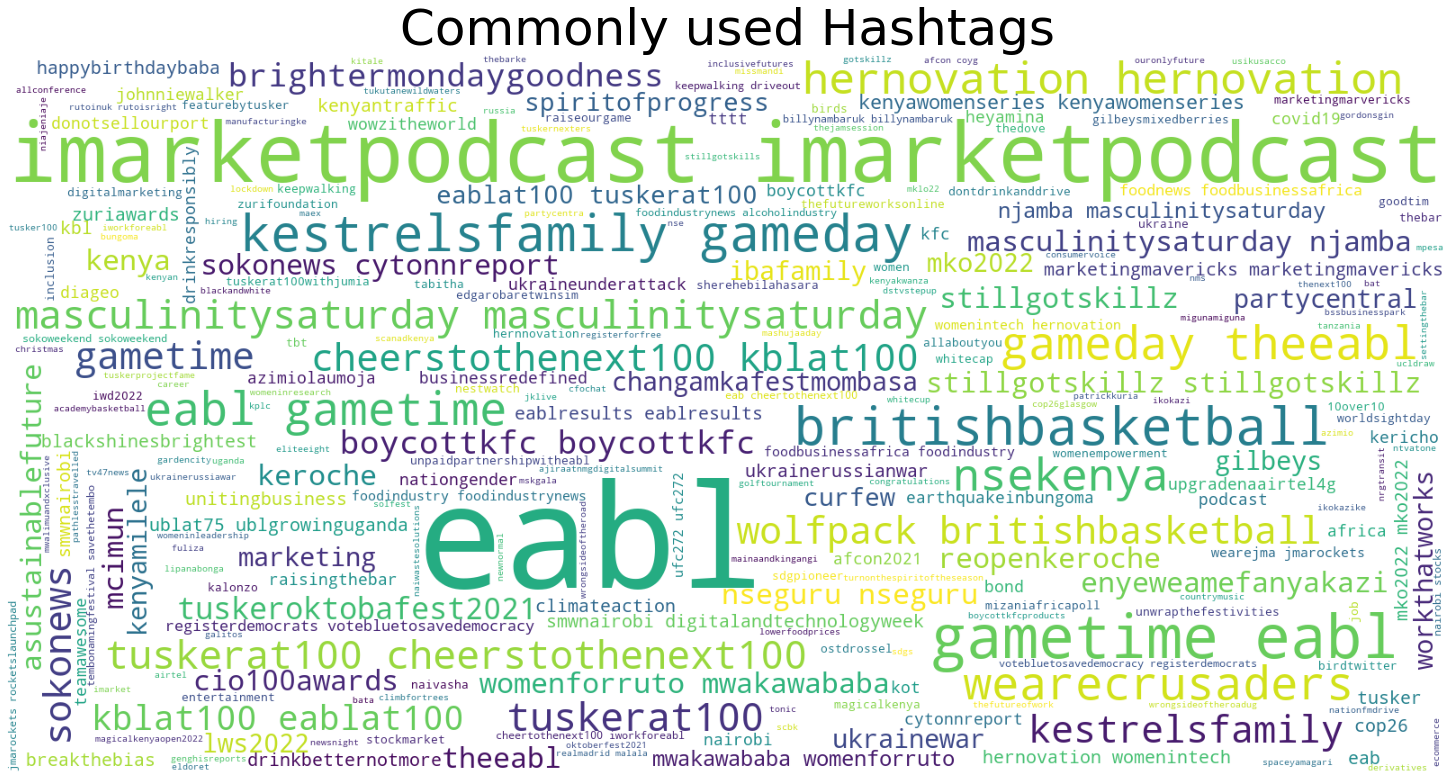

In [ ]:
# Mostly used hashtags in a word cloud
#
plt.figure(figsize=(20,20))
wc2 = WordCloud(max_words=2000, min_font_size=10, height=800, width=1600, 
        background_color="white").generate(" ".join(h_df))
plt.imshow(wc2)
plt.axis('off')
plt.title('Commonly used Hashtags', fontsize=50)
plt.tight_layout(pad=0)
plt.show()



The hashtags above present events that contributed to promoting the sale of EABL products. It also presents associative brands.

In [ ]:
# Getting frequencies of hashtags
#
h_list = df_clean['hashtags'].to_list()
import collections
c = collections.Counter(sum(h_list, []))
hash = pd.DataFrame(c.most_common(20))
hash

,0,1
0,#eabl,124
1,#imarketpodcast,81
2,#gametime,63
3,#britishbasketball,36
4,#kestrelsfamily,34
5,#masculinitysaturday,34
6,#tuskerat100,31
7,#theeabl,25
8,#gameday,23
9,#hernovation,23


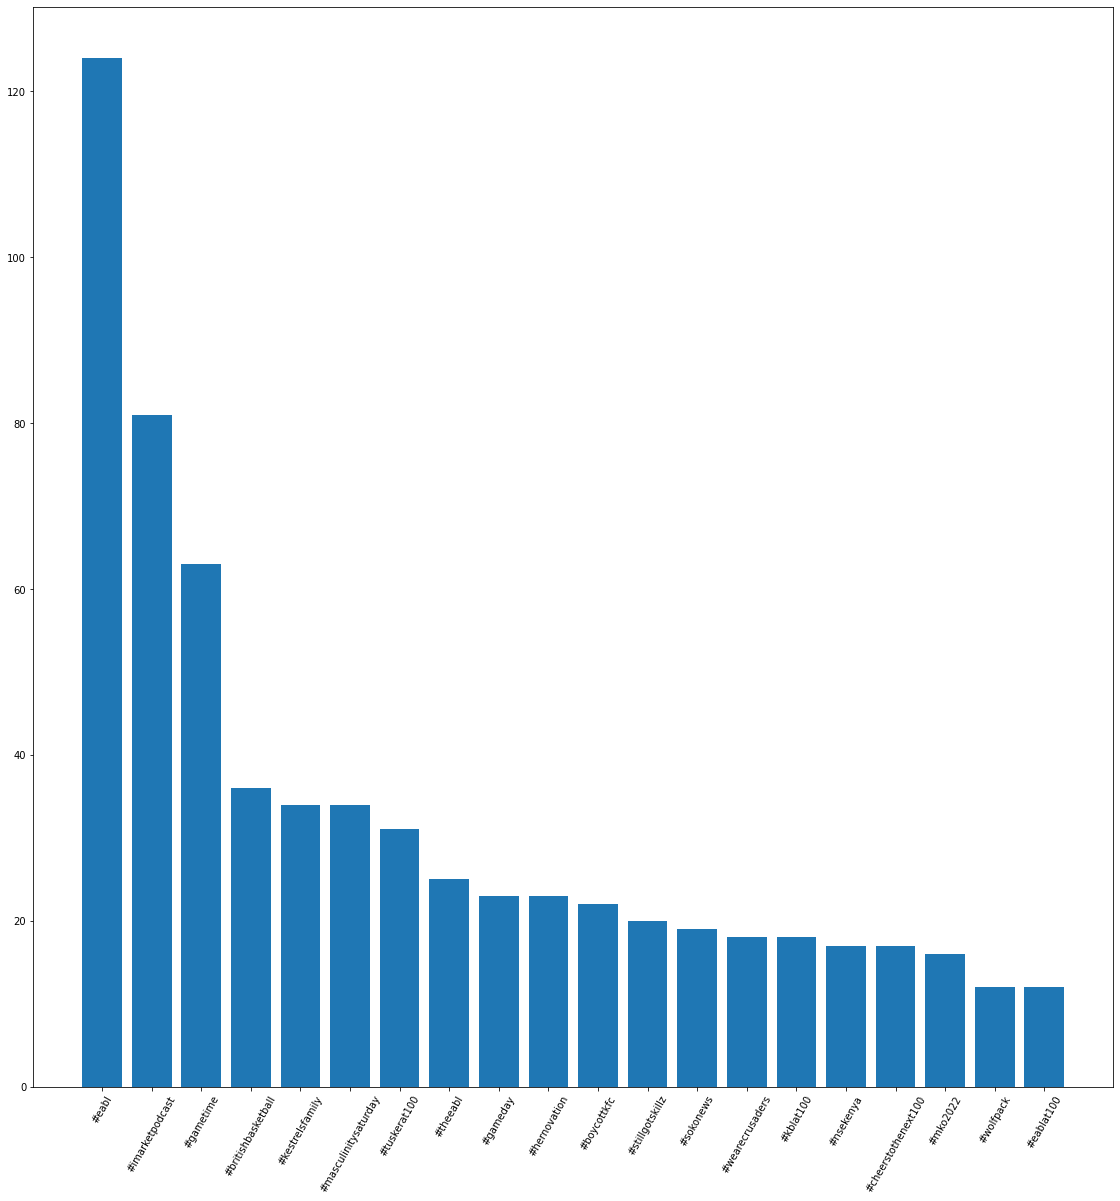

In [ ]:
# A bar plot of used hashtags
#

fig = plt.figure(figsize=(15,15))
ax = fig.add_axes([0,0,1,1])
ax.bar(hash[0],hash[1])
plt.xticks(rotation=60)
plt.show()

The most used hastags are #eabl, #imarketpodcast and #gametime

# Ats

In [ ]:
# Visualizing @s on a wordcloud
#
a_df = df_clean['ats'].apply(lambda f : ' '.join(f))

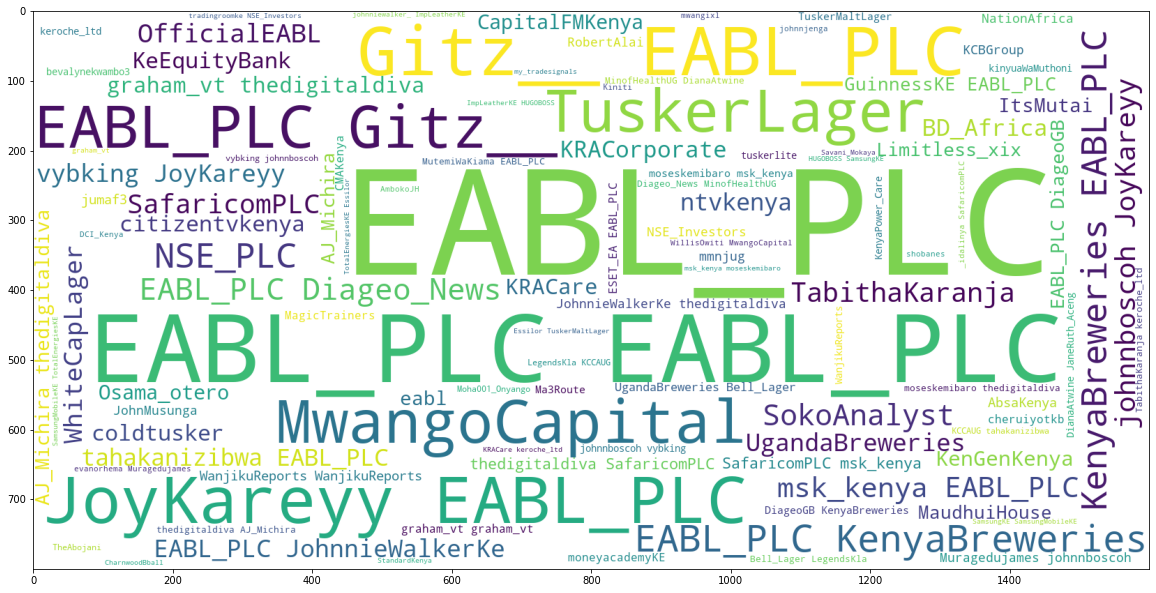

In [ ]:
# Word cloud 
#
plt.figure(figsize=(20,20))
wc2 = WordCloud(max_words=2000, min_font_size=10, height=800, width=1600, 
        background_color="white").generate(" ".join(a_df))
plt.imshow(wc2)


The tweets that have been tagged present major personal and commercial brands such as Joy Karey and Uganda Breweries.

In [ ]:
#Visiualization function
#
def make_bars(h_list , entries, f_size):
	c = collections.Counter(sum(h_list, []))
	hash = pd.DataFrame(c.most_common(entries))
	fig = plt.figure(figsize = f_size)
	ax = fig.add_axes([0,0,1,1])
	ax.bar(hash[0],hash[1])
	plt.xticks(rotation=60)
	plt.show()

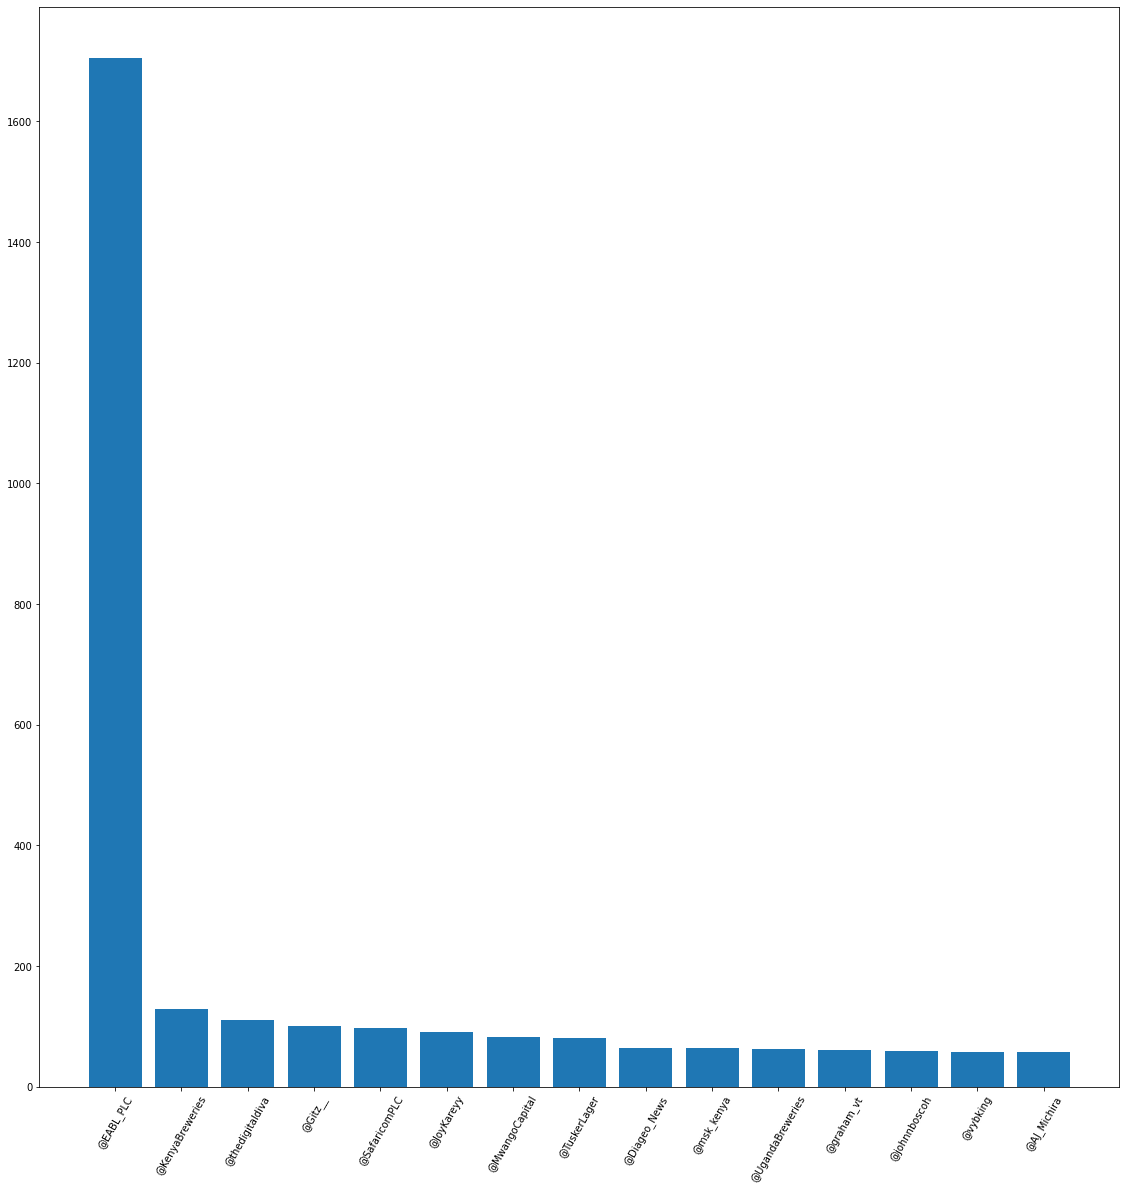

In [ ]:
# A visualization of most @s
#
make_bars(df_clean['ats'].to_list(), 15, (15,15))

@EABL_PLC is the most used at

## most common words in tweet

In [ ]:
w_df = df_clean['m_tweet'] #.apply(lambda f : ' '.join(f))

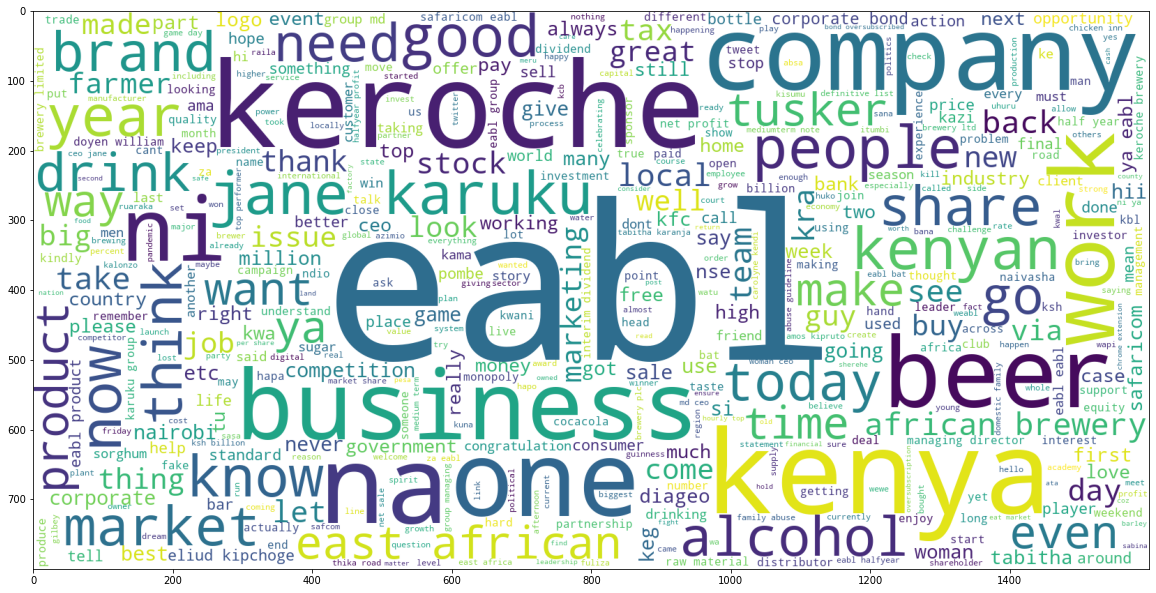

In [ ]:
# Plotting most common words in a WordCloud
#
plt.figure(figsize=(20,20))
wc2 = WordCloud(max_words=2000, min_font_size=10, height=800, width=1600, 
        background_color="white").generate(" ".join(w_df))
plt.imshow(wc2)

In [ ]:
#
w_df = df_clean['m_tweet'].apply(lambda a : a.split()).to_list()


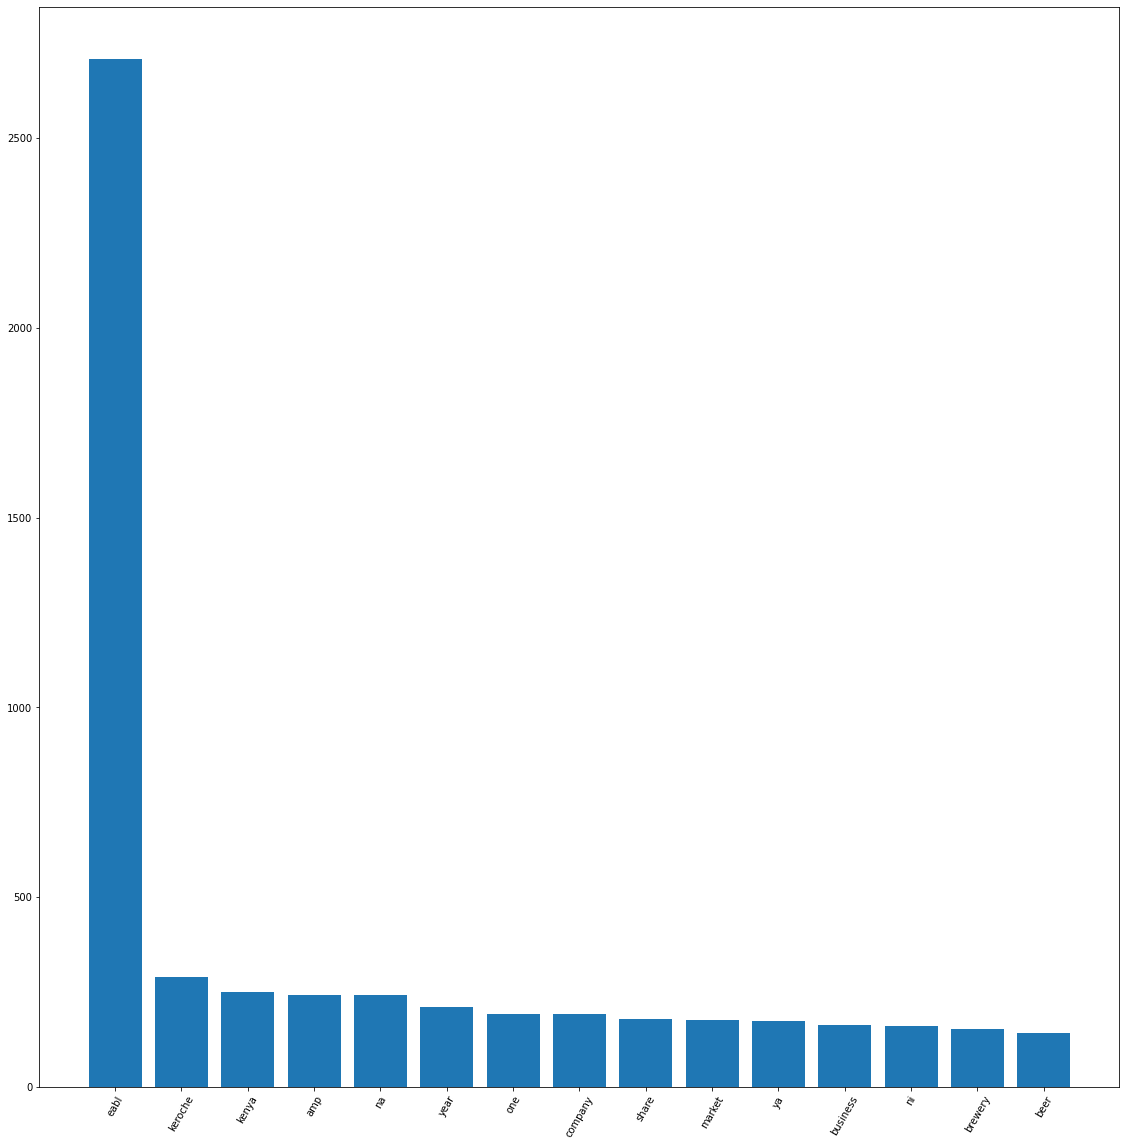

In [ ]:
# Visualizing most common words in a bar plot
#
make_bars(w_df , 15, (15,15))

most used word is eabl 

In [ ]:
# creating a def function to identify hastags and ats for visualization
#
def for_pie (a,b):
  if a == [] and b == []:
    return 0
  if a == [] and b != []:
    return 1
  if a != [] and b == []:
    return 2
  if a != [] and b != []:
    return 3
  
df_clean['pie'] = df_clean.apply(lambda r : for_pie(r['hashtags'], r['ats']) , axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:

pie = collections.Counter(df_clean['pie'].to_list())
pie

Counter({0: 957, 1: 2686, 2: 474, 3: 604})

In [ ]:
pie.values()

dict_values([2686, 957, 474, 604])

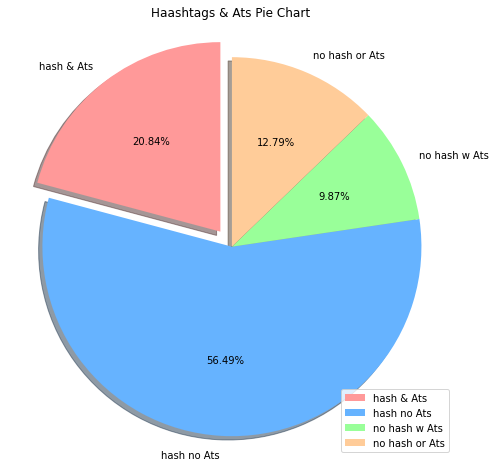

In [ ]:
# Visualizing hastags and ats in a pie chart
#
labels= ['hash & Ats', 'hash no Ats', 'no hash w Ats', 'no hash or Ats']

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

sizes= [984, 2667, 466, 604]

plt.figure(figsize =(8, 8))
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.0, 0.0, 0.0), autopct='%1.2f%%')

plt.title('Haashtags & Ats Pie Chart')

plt.axis('equal')
plt.legend(loc="lower right")
plt.show()

We observe that most tweets have more hasttags with no ats.

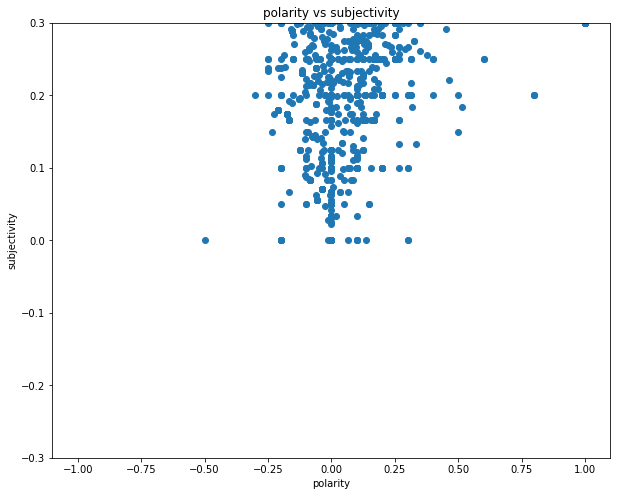

In [ ]:
# plotting the line-chart for the average polarity with the supply-chain-incidents
plt.figure(figsize =(10, 8))
plt.title("polarity vs subjectivity")
plt.xlabel("polarity")
plt.ylabel("subjectivity")
plt.ylim(-0.3, 0.3)
plt.scatter(df_clean['polarity'],	df_clean['subjectivity'])
plt.show();


Most of the point lie on the positive side


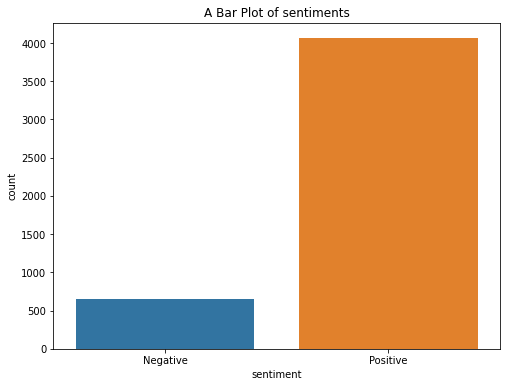

In [ ]:
# a plot of sentiments 
#
import seaborn as sns

plt.figure(figsize =(8, 6))
sns.countplot(data=df_clean, x= 'sentiment') 
plt.title("A Bar Plot of sentiments")
plt.show();



Most of the sentiments are positive

In [ ]:
# Frequency distributions of the sentiment categories
#
df_clean[['m_tweet', 'sentiment']].groupby('sentiment').describe()

m_tweet                                                            \
            count unique                                                top   
sentiment                                                                     
Negative      657    655  thika road service lane heading towards allsop...   
Positive     4064   3988                                               eabl   

                
          freq  
sentiment       
Negative     2  
Positive    43

## word count

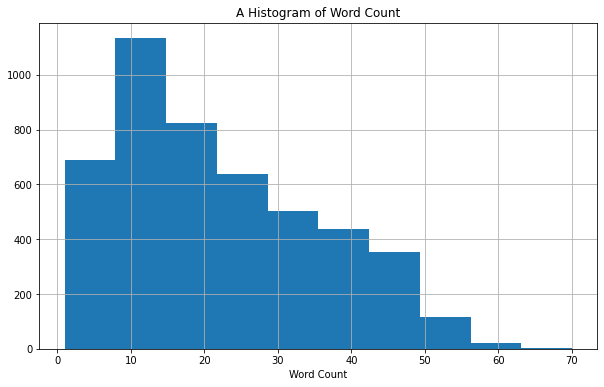

In [ ]:
# A histigrom of no of words 
#
plt.figure(figsize =(10, 6))
df_clean['no_of_words'].hist()
plt.title("A Histogram of Word Count")
plt.xlabel("Word Count")
plt.show();

Number of words used are skewed to the right with most words ranging between 10 - 20 words.

## length

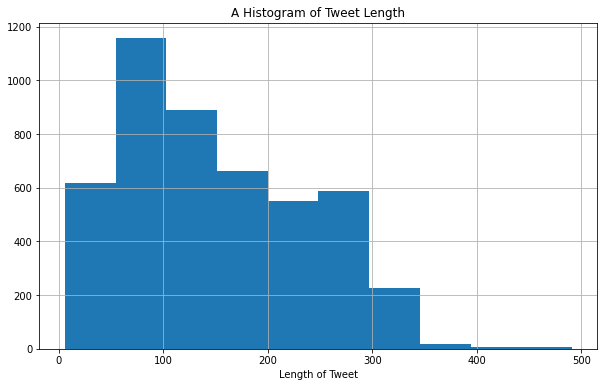

In [ ]:
# A histogram to show distribution of tweet length
#
plt.figure(figsize =(10, 6))
df_clean['length_of_tweet'].hist()
plt.title("A Histogram of Tweet Length")
plt.xlabel("Length of Tweet")
plt.show();


There is an outlier here the limit of characters is 280\
Most of the characters lie between 50 to 150

# Model Building

## BERT

In [ ]:
# Installing Transformer
#
!pip install transformers

In [ ]:
# Loading BERT Tokenizer and Sequence Classifier
#
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

# build our model with the Sequence Classifier and our tokenizer with BERT’s Tokenizer.
#
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
# looking at the summary of our model
#
model.summary()

Model: "tf_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_75 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# getting dataset
#
dataset = df_clean.copy()
dataset['sentiment']

0       Negative
1       Negative
2       Positive
3       Positive
4       Positive
          ...   
4996    Positive
4997    Positive
4998    Positive
4999    Positive
5000    Positive
Name: sentiment, Length: 4721, dtype: object

In [ ]:
dataset['sentiment'].value_counts()

Positive    4064
Negative     657
Name: sentiment, dtype: int64

In [ ]:
# dataset[dataset['sentiment'] == 'Negative'].to_csv('check.csv')

In [ ]:
# creating instance of labelencoder
#
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
dataset['sentiment_Cat'] = labelencoder.fit_transform(dataset['sentiment'])
dataset.head()

,tweet,nr_tweet,c_tweet,hashtags,ats,m_tweet,h_tweet,a_tweet,no_of_punctuations,no_of_at,...,no_of_words_no_hash,no_of_words_no_at_hash,length_of_tweet,is_there_digit,polarity,subjectivity,sentiment_score,sentiment,pie,sentiment_Cat
0,@belladonnarthy @EABL_PLC @OfficialEABL Why no...,@belladonnarthy @EABL_PLC @OfficialEABL Why no...,@belladonnarthy @eabl_plc @officialeabl talk m...,[],"[@belladonnarthy, @EABL_PLC, @OfficialEABL]",talk man standing next youthe way fucking frie...,talk man standing next youthe way fucking frie...,@belladonnarthy @eabl_plc @officialeabl talk m...,12,3,...,52,49,300,0,-0.244444,0.322222,-0.244444,Negative,1,0
1,I have made the executive decision to dump a m...,I have made the executive decision to dump a m...,made executive decision dump majority eabl sha...,[],[],made executive decision dump majority eabl sha...,made executive decision dump majority eabl sha...,made executive decision dump majority eabl sha...,3,0,...,40,40,218,0,-0.166667,0.166667,-0.166667,Negative,0,0
2,@Gossip_ke EABL,@Gossip_ke EABL,@gossip_ke eabl,[],[@Gossip_ke],eabl,eabl,@gossip_ke eabl,1,1,...,1,0,15,0,0.000000,0.000000,0.000000,Positive,1,1
3,A personal mindset may no longer be benefiting...,A personal mindset may no longer be benefiting...,personal mindset may longer benefiting you mot...,[],[],personal mindset may longer benefiting you mot...,personal mindset may longer benefiting you mot...,personal mindset may longer benefiting you mot...,9,0,...,16,16,106,4,0.250000,0.400000,0.250000,Positive,0,1
4,"@DCI_Kenya These people need to be supported, ...","@DCI_Kenya These people need to be supported, ...",@dci_kenya people need supported educated allo...,[],[@DCI_Kenya],people need supported educated allowed legit b...,people need supported educated allowed legit b...,@dci_kenya people need supported educated allo...,6,1,...,50,49,291,0,0.083333,0.125000,0.083333,Positive,1,1


In [ ]:
# Splitting data to Test And Train
# 
from sklearn.model_selection import train_test_split

#X = dataset['m_tweet'].values
#y = dataset['sentiment_Cat'].values

# Splitting
#
X_train, X_test, y_train, y_test = train_test_split(dataset['m_tweet'],dataset['sentiment_Cat'], stratify=dataset['sentiment_Cat'])

In [ ]:
# Having a preview of four random tweets
X_train.head(4)

105          keg boy wakieza lipwa io 45k eabl inarun keg
2698    hear eabl choked diageo expansion bit problema...
1146    beat subdue inside keep clean junet kibaki wai...
1498    mean keep moving toward maximum toward goal st...
Name: m_tweet, dtype: object

In [ ]:
# Importing the BERT model and get embeding vectors for few sample statements
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "april kengen dividend may equity dividend june dtb dividend december eabl dividend etc etc 30 company giving dividend 12 months roughly 2 company give dividend per month", 
    "congratulations randolph worthy battle well fought"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.76714677, -0.50818706, -0.9106386 , ..., -0.8746817 ,
        -0.5109933 ,  0.58340776],
       [-0.7958028 , -0.30796185, -0.18262923, ..., -0.00731859,
        -0.5728452 ,  0.7973774 ]], dtype=float32)>

In [ ]:
# Get embeding vectors for few sample words. Compare them using cosine similarity
e = get_sentence_embeding([
    "bread", 
    "grapes",
    "mango",
    "Jasmine Wakini",
    "Ruth Nguli",
    "Billiah Kerubo"
]
)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])

array([[0.9748139]], dtype=float32)

Values near to 1 means they are similar. 0 means they are very different. Above you can use comparing "bread" vs "grapes" you get 0.99 similarity as they both are food.

In [ ]:
cosine_similarity([e[0]],[e[3]])

array([[0.8867198]], dtype=float32)

Comparing bread with Jasmine Wakini you still get 0.88 but it is not as close as 0.99 that we got with grapes

In [ ]:
cosine_similarity([e[3]],[e[4]])

array([[0.8586653]], dtype=float32)

Jasmine Wakini and Ruth Nguli are more similar then Jasmine Wakini and bread as indicated above

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
# The summary of our BERT model:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [ ]:
# Length of X_train and X_test
print(len(X_train))
print(len(X_test))

3540
1181


In [ ]:
# Obtaining the metrics needed for our assessment
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
# Training the model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
111/111 [==============================] - 44s 302ms/step - loss: 0.4117 - accuracy: 0.8588 - precision: 0.8607 - recall: 0.9974
Epoch 2/10
111/111 [==============================] - 34s 307ms/step - loss: 0.3982 - accuracy: 0.8607 - precision: 0.8607 - recall: 1.0000
Epoch 3/10
111/111 [==============================] - 35s 311ms/step - loss: 0.3953 - accuracy: 0.8607 - precision: 0.8607 - recall: 1.0000
Epoch 4/10
111/111 [==============================] - 35s 313ms/step - loss: 0.3922 - accuracy: 0.8607 - precision: 0.8607 - recall: 1.0000
Epoch 5/10
111/111 [==============================] - 35s 318ms/step - loss: 0.3853 - accuracy: 0.8599 - precision: 0.8606 - recall: 0.9990
Epoch 6/10
111/111 [==============================] - 35s 317ms/step - loss: 0.3852 - accuracy: 0.8602 - precision: 0.8607 - recall: 0.9993
Epoch 7/10
111/111 [==============================] - 35s 319ms/step - loss: 0.3871 - accuracy: 0.8605 - precision: 0.8609 - recall: 0.9993
Epoch 8/10
111/111 [

In [ ]:
# Model evaluation
model.evaluate(X_test, y_test)

37/37 [==============================] - 12s 311ms/step - loss: 0.3751 - accuracy: 0.8611 - precision: 0.8611 - recall: 1.0000


[0.3751351535320282, 0.8611346483230591, 0.8611346483230591, 1.0]

The model attained an accuracy score of 85.77%.\
The model posted 99.70% at identifying positives correctly.


In [ ]:
# Prediction
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [ ]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# Confussion matrx
cm = confusion_matrix(y_test, y_predicted)
cm

array([[   0,  164],
       [   0, 1017]])

Text(69.58333333333334, 0.5, 'Truth')

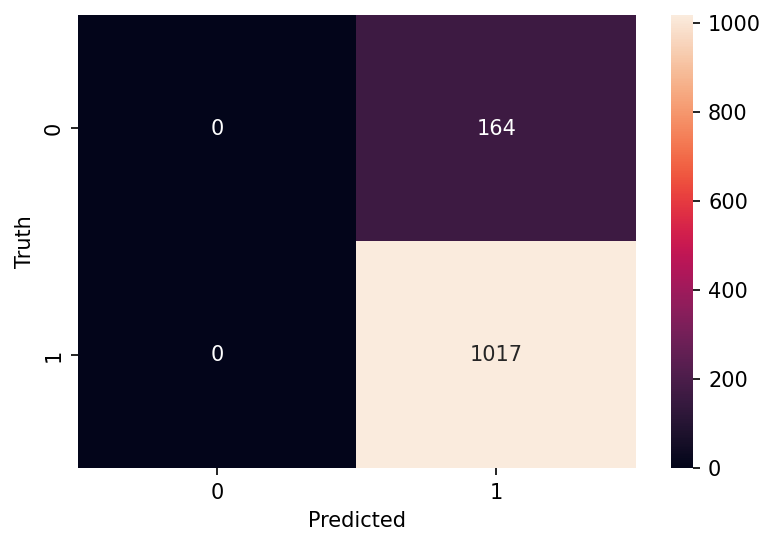

In [ ]:
# Visualizing the confusion matrix

plt.figure(dpi=150)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

First row explanation: 1 variable was correctly  identified positive and True (predicted positive). and
The model identified 165 false positives \
Second row explanation: The model predicted 1 false negative and The model predicted 1012 true negatives 

In [ ]:
# Classification report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       164
           1       0.86      1.00      0.93      1017

    accuracy                           0.86      1181
   macro avg       0.43      0.50      0.46      1181
weighted avg       0.74      0.86      0.80      1181



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Inference
sentiments = [
    "april kengen dividend may equity dividend june dtb dividend december eabl dividend etc etc 30 company giving dividend 12 months roughly 2 company give dividend per month", 
    "congratulations randolph worthy battle well fought"]
model.predict(sentiments)

array([[0.8027262],
       [0.9093613]], dtype=float32)

## Naive Bayes

In [ ]:
# Finally, we will transform the data into occurrences, 
# which will be the features that we will feed into our model
# 

from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
counts = count_vectorizer.fit_transform(dataset['m_tweet'])  
counts

<4721x56276 sparse matrix of type '<class 'numpy.int64'>'
	with 108323 stored elements in Compressed Sparse Row format>

In [ ]:
# We could leave it as the simple word-count per message, but it is better to use Term Frequency Inverse Document Frequency, more known as tf-idf
# 
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer().fit(counts)

counts = transformer.transform(counts)

In [ ]:
# Training the Model
# Now that we have performed feature extraction from our data, it is time to build our model. 
# We will start by splitting our data into training and test sets
# 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(counts, dataset['sentiment_Cat'], test_size=0.1, random_state=69)

In [ ]:
# Printing splitted dataset sizes
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (4248, 56276)
X_test_shape :  (473, 56276)
y_train_shape :  (4248,)
y_test_shape :  (473,)


In [ ]:
# We will use Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)
print(np.mean(predicted_naive == y_test))

0.8520084566596194


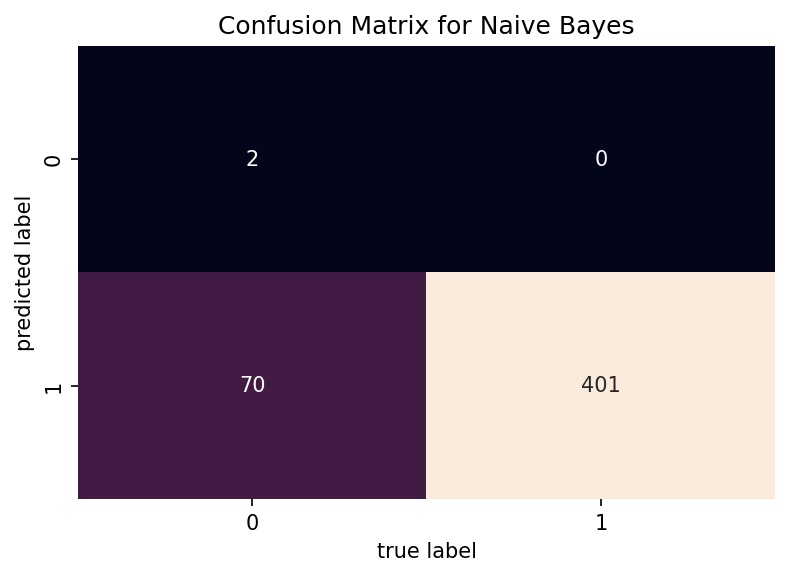

In [ ]:
# Print Confusion matrix
from sklearn.metrics import confusion_matrix

plt.figure(dpi=150)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [ ]:
# Find out accuracy of our prediction
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)


Accuracy with Naive-bayes:  0.8520084566596194
